In [ ]:
import yfinance as yf

In [ ]:
import datetime 
INTERVAL = '1d'    
symbol = '^GSPC'      

In [ ]:
start = "2010-01-01"
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,4299.700195,3846230000


(array([278., 373., 185., 144., 240., 455., 123., 176., 177., 268., 141.,
         87.,  71.,  41.,  98., 143., 156., 124., 133.,  47.]),
 array([1022.58001709, 1211.27901917, 1399.97802124, 1588.67702332,
        1777.37602539, 1966.07502747, 2154.77402954, 2343.47303162,
        2532.17203369, 2720.87103577, 2909.57003784, 3098.26903992,
        3286.96804199, 3475.66704407, 3664.36604614, 3853.06504822,
        4041.76405029, 4230.46305237, 4419.16205444, 4607.86105652,
        4796.56005859]),
 <BarContainer object of 20 artists>)

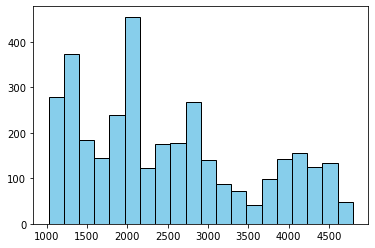

In [ ]:
import matplotlib.pyplot as plt

df = data['Close']

# Create a histogram to visualize the data distribution
plt.hist(df, bins=20, color='skyblue', edgecolor='black')

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3.460000e+03
mean,2500.000064,2513.693931,2485.255560,2500.453355,2500.453355,3.940987e+09
std,1047.771525,1054.068980,1041.047711,1047.723837,1047.723837,9.647344e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,1.025000e+09
25%,1633.687500,1643.595032,1627.287476,1633.752502,1633.752502,3.359130e+09
50%,2185.625000,2188.255005,2179.899902,2186.689941,2186.689941,3.778535e+09
75%,3164.490051,3184.817444,3143.049927,3169.085022,3169.085022,4.320378e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.061781e+10


In [ ]:
del data["Adj Close"]

<AxesSubplot:>

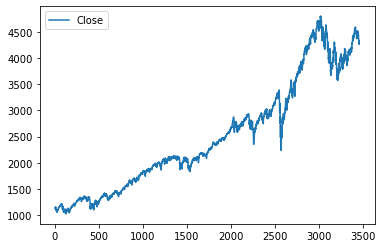

In [ ]:
data.plot.line(y="Close", use_index=False)

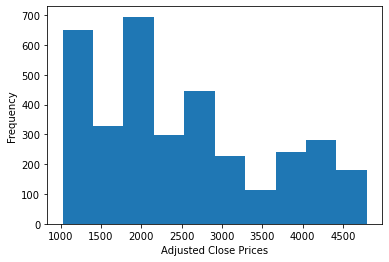

In [ ]:
import matplotlib.pyplot as plt

# Histogramme de Adj Close
plt.hist(data['Close'], bins=10)
plt.xlabel('Adjusted Close Prices')
plt.ylabel('Frequency')

plt.show()

<AxesSubplot:title={'center':'Adjusted Close Prices - 200-Day Moving Average'}, xlabel='Date'>

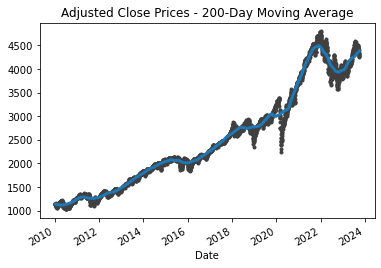

In [ ]:
df=data['Close']
moving_average = df.rolling(
    window=200,       
    center=True,      
    min_periods=100,  
).mean()              

ax = df.plot(style=".", color="0.25")
moving_average.plot(
    ax=ax, linewidth=3, title="Adjusted Close Prices - 200-Day Moving Average", legend=False
)


In [ ]:
# Calculer la moyenne mobile sur 50 jours
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculer le RSI sur 14 jours
change = data['Close'].diff()
gain = change.mask(change < 0, 0)
loss = -change.mask(change > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [ ]:
df1=data.dropna()

In [ ]:
data=data.dropna()
data

,Open,High,Low,Close,Volume,SMA_50,RSI
Date,,,,,,,
2010-03-16,1150.829956,1160.280029,1150.349976,1159.459961,4369770000,1113.826594,95.395175
2010-03-17,1159.939941,1169.839966,1159.939941,1166.209961,4963200000,1114.490994,99.298813
2010-03-18,1166.130005,1167.770020,1161.160034,1165.829956,4234510000,1115.077192,98.682607
2010-03-19,1166.680054,1169.199951,1155.329956,1159.900024,5212410000,1115.532393,88.286421
2010-03-22,1157.250000,1167.819946,1152.880005,1165.810059,4261680000,1116.014795,88.921808
...,...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4468.565000,25.527165
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4462.955596,26.686156
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4457.635195,30.159703
